\
<font size = 6 color='black'><b><u><i><center>.Pubg Dataset #1 killPlace.</b></i></u></center></font>
\
<font size = 5 color='brown'><center>By: Ahmed Metwalli</center></font>

<font size = 6 color='black'><b><i><center>Content</b></i></center></font>
\
\
<font size = 4 ><b>1. Introduction\
    \
    2. Data Explore And Data Wrangling\
    \
    3. Choosing Area Of Interest\
    \
    4. Data Visualization\
    \
    5. Predictions

<font size = 6 color='black'><b><i><u>Introduction<b><i><u></font>\
    \
<font size =4 color='blue'><i>Pubg is a great multiplayer online game that has conquered the market since 2018 till now. It contains my features and analytics to explore from variety of players. In this report we would like to investigate how do a player finish in the first place in terms of kill [killPlace #1] performing wrangling visualization and predictions.



<b>About initial data train_v2.csv</b>: Shape 4446966 x 29\
The data set, available here ['https://www.kaggle.com/c/pubg-finish-placement-prediction/data?select=train_V2.csv'], consists of 29 statistics collected for 4446966 players. <b>The statistics are</b>:\
Id: player’s Id\
assists: number of enemy that this player damaged and were killed by teammates\
boosts: number of boost items used\
heals: number of healing items used\
revives: number of times this player revived teammates\
damageDealt: total damage dealt. Note: Self inflicted damage is subtracted\
DBNOs: number of enemy knocked\
killPlace: ranking in match for number of enemy killed\
killPoints: kills-based external ranking of player [“0” should be treated as a “None” for rankPoints equal to -1]\
killStreaks: max number of enemy killed in a short amount of time\
kills: number of enemy killed\
headshotKills: number of enemy killed with headshots\
roadKills: number of kills while in a vehicle\
teamKills: number of times this player killed a teammate\
longestKill: longest distance between this player and a player killed at time of death\
rideDistance: total distance traveled in vehicles measured in meters\
swimDistance: total distance traveled by swimming measured in meters\
vehicleDestroys: number of vehicles destroyed\
walkDistance: total distance traveled on foot measured in meters\
weaponsAcquired: number of weapons picked up\
winPoints: win-based external ranking for player [“0” should be treated as a “None” for rankPoints equal to -1]\
winPlacePerc: percentile winning placement, where 1 corresponds to 1st place. It is calculated off of maxPlace [TARGET]\
rankPoints: Elo-like ranking of player, inconsistent and is being deprecated in the API’s next version\
groupId: ID group within a match. In different matches the same group of players will have a different IDs\
matchDuration: duration of match in seconds\
matchId: ID to identify match\
matchType: game mode such as: “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, “squad-fpp”, and other custom modes\
numGroups: number of groups we have data for in the match\
maxPlace: worst placement we have data for in the match

<b><i><u><font size=4>Writing color encoding along the report:</u></i></font>\
<font color='indigo'>Questions: Indigo\
<font color='red'>Notes Or Wranglings: Red\
<font color='blue'>Explanations And Comments: Blue

<font size = 6 color='black'><b><i><u>Data Explore<b><i><u></font>

<font size=5 color='red'><b>Note: If you downloaded train_v2.csv data so you can uncomment the following lines till Data Visualization. If not you can go to the section of 'Data Visualization' and run the code from there since there will be the area of interest of this data.

In [71]:
#import pandas as pd

In [72]:
#train_df = pd.read_csv("train_V2.csv")

In [73]:
#test_df = pd.read_csv("test_V2.csvst_V2.csv")

In [74]:
#train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [75]:
#train_df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [76]:
#train_df.weaponsAcquired.max()

236

In [77]:
#train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [78]:
#train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


<font size=5> <font color='red'>Note: </font>The max headshotkills for a player and this indicates that the user is hacker or the data entry was corrupted</font>

In [79]:
#train_df[train_df['headshotKills']==6.400000e+01]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


In [80]:
#train_df[train_df['groupId']=='4c4ee1e9eb8b5e']['kills']

65128      14
1257861    21
3431247    72
Name: kills, dtype: int64

In [81]:
#train_df[train_df['matchId']=='6680c7c3d17d48']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
65128,249c1ce67f8f08,4c4ee1e9eb8b5e,6680c7c3d17d48,8,9,1684.00,0,3,10,21,...,0,0.00,0,0.0,1,0,62.77,46,0,1.0000
97279,b1a89f5bfa80d1,fb7164eb0e0088,6680c7c3d17d48,11,3,1371.00,0,1,3,23,...,0,0.00,0,0.0,0,0,0.00,38,0,0.3571
269922,7bfaeb8870182a,6b0360ae91b260,6680c7c3d17d48,10,3,2397.00,0,7,11,11,...,0,0.00,0,0.0,0,0,0.00,53,0,0.7857
338090,306cb3a440e321,9aabee0254fa52,6680c7c3d17d48,0,0,0.00,0,0,0,47,...,0,0.00,0,0.0,0,0,0.00,8,0,0.0714
339826,17dad06cd61000,9aabee0254fa52,6680c7c3d17d48,1,0,271.60,0,0,0,38,...,0,0.00,0,0.0,0,0,0.00,12,0,0.0714
448490,672dca69230fcd,1c58119dccc248,6680c7c3d17d48,1,1,968.40,0,5,0,22,...,0,0.00,0,0.0,0,0,0.00,28,0,0.6429
712609,f0e57dc47a2bd2,4ecd3a9a2baf23,6680c7c3d17d48,1,1,158.20,0,1,6,35,...,0,0.00,0,0.0,0,0,0.00,8,0,0.5000
893254,1e9a30ef5c4a3a,a9575d80d9e2ab,6680c7c3d17d48,5,2,860.60,0,3,1,25,...,0,0.00,0,0.0,0,0,326.40,31,0,0.2143
1115644,8f84841ef0f2e2,7e3a62ea8f1832,6680c7c3d17d48,7,1,2444.00,0,6,1,10,...,0,1556.00,0,0.0,1,0,1248.00,66,0,0.8571
1172370,63702be8e39714,6b0360ae91b260,6680c7c3d17d48,8,1,1510.00,0,5,5,20,...,0,0.00,0,0.0,0,0,45.75,34,0,0.7857


In [82]:
#train_df[train_df['matchId']=='6680c7c3d17d48']['kills']

65128      14
97279      13
269922     24
338090      0
339826      2
448490     13
712609      3
893254     10
1115644    25
1172370    15
1214559     0
1257861    21
1274368     8
1285748    22
1293331     2
1295313    35
1714190    28
1805838     8
2189718     0
2318139    26
2343424    38
2367854     4
2462411    23
2624188     9
2651552     6
2686412     1
2709640     1
2742951    20
2889342    26
2984789     2
3007594    19
3045744    28
3142858    27
3182446     6
3206834    44
3230315    17
3298104     6
3360542    20
3392565     7
3431247    72
3446497    11
3574558     1
3990301     9
3995503     0
4136469     1
4179101    19
4300946     1
Name: kills, dtype: int64

In [83]:
#train_df[train_df['matchId']=='6680c7c3d17d48']['kills'].sum()

687

In [84]:
#train_df.groupby('matchId')['kills'].sum().mean()

85.73918482226624

In [85]:
#clear sample

In [86]:
#train_df['winPlacePerc'].mean()

0.47282155272191256

In [87]:
#train_df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


<font size=6 color='black'><b><u>Area of interest:</b></u>The people who finish #1 killPlace 

<font size=5 color='blue'> Features are ['boosts', 'damageDealt', 'DBNOs', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'walkDistance', 'weaponsAcquired'] based on correlation with the wanted variable.

<font size=5 color='blue'>> Choosing which features to be taken into consideration based on the correlation of a feature with killPlace. Since it is our interest killPlace #1 a,k,a the highest kills done in a game, we decided to put a threshold on correlation which is 0.5 and -0.5 

In [88]:
#tmp = train_df.corr()['killPlace']

In [89]:
#tmp[(tmp>0.49) | (tmp<-0.49)]

boosts            -0.554844
damageDealt       -0.677398
DBNOs             -0.555289
killPlace          1.000000
kills             -0.730498
killStreaks       -0.810516
longestKill       -0.541146
walkDistance      -0.590236
weaponsAcquired   -0.490143
winPlacePerc      -0.719069
Name: killPlace, dtype: float64

In [90]:
#_.index

Index(['boosts', 'damageDealt', 'DBNOs', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'walkDistance', 'weaponsAcquired', 'winPlacePerc'],
      dtype='object')

<font size=5 color='red'>We do not need winPlacePerc since we only want the in-game statistics of actions

In [91]:
#aoi = train_df[['Id','groupId','matchId','boosts', 'damageDealt', 'DBNOs', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'walkDistance', 'weaponsAcquired']]

<font size=5 color='red'>Note: In this work we are not putting the match type into consideration.

In [92]:
#del train_df,tmp

<font size=5 color='blue'><b>Analysing the area of interest #1 killPlace the players who finish the matches with highest kills

In [95]:
#df = aoi.copy()

In [94]:
#del aoi

In [117]:
#df.sample(25)

,Id,groupId,matchId,boosts,damageDealt,DBNOs,killPlace,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
1868217,c8b0958917e26b,9dd3e3dbccae8d,69171fa5fee337,0,0.00,0,58,0,0,0.000,1318.00,3
981742,22690cf8d7ec4d,0d240a9932b1d3,d04752de095302,5,144.00,1,14,2,2,75.920,5304.00,7
1835519,97fa4b55f1a48a,1e73b8159639d8,00f83247190d14,0,0.00,0,63,0,0,0.000,148.00,3
3121800,e3f988bb156613,a1339fb7cada7e,50f24d1be57671,4,995.70,0,1,7,1,145.800,1652.00,7
2799367,c229fe680e9aed,0ed1c2d9e4a82b,78ac86c06a4b87,2,307.40,3,19,2,1,84.280,2664.00,4
4008008,900bd9cec534d9,b25b4fcf5ff3ff,47bfc10ad1c39a,0,30.96,0,87,0,0,0.000,26.51,1
2755544,c3e73dab0500e7,11b054d1ab6e2e,d10c30192ac484,0,45.31,0,90,0,0,0.000,68.20,2
3550150,63e42e65803f25,915d873a62cb12,f80da06100b1eb,0,0.00,0,84,0,0,0.000,82.29,2
3577376,e01843adbea59e,8d2910b2cefa90,2e363808368775,0,0.00,0,82,0,0,0.000,35.37,2
3977185,9dd67a59e4ef90,2e2d2817cc1acb,82d5150dae66c5,0,24.48,0,86,0,0,0.000,49.10,1


In [118]:
#df.shape

(4446966, 12)

In [99]:
#df.killPlace.value_counts()

1      47965
2      47964
3      47962
4      47962
5      47962
       ...  
97     16080
98     10005
99      4461
100     1415
101        1
Name: killPlace, Length: 101, dtype: int64

<font size=6 color='indigo'><b>The question here is how does each feature impact the #1 killPlace, then the region of interest becomes as follows:

<font size=6><b><i><u>Data Wrangling 1

In [127]:
#n1 = df[df['killPlace']==1]
#n1.drop('killPlace',axis=1,inplace=True)
#Resetting the index
#n1.reset_index(inplace=True)
#n1.drop('index',axis=1,inplace=True)

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
#n1.head()

,Id,groupId,matchId,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,9ac54e66c0a5d3,d973f082d6c416,15535f0f9d9e46,7,1120.0,8,14,3,112.50,3503.0,8
1,e648bbd69e6782,f59a06b3f15665,2c42aa41a9b7a9,6,1563.0,10,13,3,270.30,3723.0,7
2,e65e9fa8ba75c6,fc8b08c649efd6,45234443e81340,11,817.0,0,9,2,157.40,2396.0,4
3,7d177135ae61d3,4cbacf343e57a5,ccd48872e49361,8,623.7,4,7,2,101.30,2539.0,3
4,d08c6cc4910f13,b69b58dea1ee5d,bb7383b0bcfb62,5,1036.0,7,6,2,75.61,3226.0,10


In [126]:
#n1.shape

(47965, 11)

In [131]:
n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47965 entries, 0 to 47964
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               47965 non-null  object 
 1   groupId          47965 non-null  object 
 2   matchId          47965 non-null  object 
 3   boosts           47965 non-null  int64  
 4   damageDealt      47965 non-null  float64
 5   DBNOs            47965 non-null  int64  
 6   kills            47965 non-null  int64  
 7   killStreaks      47965 non-null  int64  
 8   longestKill      47965 non-null  float64
 9   walkDistance     47965 non-null  float64
 10  weaponsAcquired  47965 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.0+ MB


In [132]:
#n1.describe()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
count,47965.000000,47965.000000,47965.000000,47965.000000,47965.000000,47965.000000,47965.000000,47965.000000
mean,4.891108,822.695905,4.312791,7.998687,2.095674,142.394063,2866.804710,5.798207
std,2.444114,326.771785,3.018002,2.829521,0.830446,101.304614,949.314751,2.667904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,618.600000,3.000000,6.000000,2.000000,72.450000,2333.000000,4.000000
50%,5.000000,776.600000,4.000000,8.000000,2.000000,118.700000,2905.000000,5.000000
75%,6.000000,968.700000,6.000000,9.000000,2.000000,188.100000,3432.000000,7.000000
max,33.000000,6616.000000,53.000000,72.000000,20.000000,1001.000000,13430.000000,77.000000


<font size=4 color='red'><b>> First of all we can see that there are some outliers since it is not logic that we see a number of kills = 72 , DBNOs (Enemy Down But Not Out) = 53 and weaponsAcquired in a single game =77 (It can be happening but it is considered as outlier. This would indicate that the player is a hacker or a corruption during data entry or a very weak server. So it is out of competition then we need to remove these outliers by using quantile(0.999)

In [186]:
#tmp=n1.copy()

In [187]:
#tmp = tmp[tmp['kills']<tmp['kills'].quantile(0.999)]  
#tmp = tmp[tmp['DBNOs']<tmp['DBNOs'].quantile(0.999)]
#tmp = tmp[tmp['weaponsAcquired']<tmp['weaponsAcquired'].quantile(0.999)]

In [188]:
#tmp.describe()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
count,47811.000000,47811.000000,47811.000000,47811.000000,47811.000000,47811.000000,47811.000000,47811.000000
mean,4.901550,816.417115,4.290791,7.937127,2.089498,142.122984,2872.817052,5.730334
std,2.433854,300.619112,2.905548,2.513802,0.812088,100.473842,942.348324,2.222351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,618.200000,3.000000,6.000000,2.000000,72.435000,2338.000000,4.000000
50%,5.000000,775.500000,4.000000,8.000000,2.000000,118.700000,2907.000000,5.000000
75%,6.000000,966.200000,6.000000,9.000000,2.000000,187.900000,3433.000000,7.000000
max,33.000000,3240.000000,19.000000,30.000000,18.000000,1001.000000,13430.000000,26.000000


In [189]:
#tmp.shape

(47811, 11)

In [190]:
#tmp.reset_index(inplace=True)
#tmp.drop('index',axis=1,inplace=True)

In [191]:
#tmp.head()

,Id,groupId,matchId,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,9ac54e66c0a5d3,d973f082d6c416,15535f0f9d9e46,7,1120.0,8,14,3,112.50,3503.0,8
1,e648bbd69e6782,f59a06b3f15665,2c42aa41a9b7a9,6,1563.0,10,13,3,270.30,3723.0,7
2,e65e9fa8ba75c6,fc8b08c649efd6,45234443e81340,11,817.0,0,9,2,157.40,2396.0,4
3,7d177135ae61d3,4cbacf343e57a5,ccd48872e49361,8,623.7,4,7,2,101.30,2539.0,3
4,d08c6cc4910f13,b69b58dea1ee5d,bb7383b0bcfb62,5,1036.0,7,6,2,75.61,3226.0,10


In [ ]:
#df = tmp.copy()

### Secondary Wrangling

##### >Drop unwanted columns since we are looking at the numerical data and matchId,Id,groupId will not give informations about anything in this case of killPlace #1

In [241]:
#df.drop(columns=['matchId','Id','groupId'],inplace=True)

##### >Players with walkDistance 0 or kills 0 or damageDealt 0 and finish in killPlace #1 are out of context. They need to be dropped.

In [242]:
#df.drop(df[df['walkDistance']==0].index,inplace=True)

In [243]:
#df.drop(df[df['kills']==0].index,inplace=True)

In [244]:
#df.drop(df[df['damageDealt']==0].index,inplace=True)

In [245]:
#df.drop(df[df['longestKill']==0].index,inplace=True)

In [246]:
#df.drop(df[df['weaponsAcquired']==0].index,inplace=True)

In [247]:
#df.shape

(47343, 8)

In [248]:
#df.reset_index(inplace=True)

In [249]:
#df.drop(columns='index',inplace=True)

In [192]:
#df.to_csv('pubg_dataset_area_of_interest.csv',index=False)

In [193]:
#del tmp,n1,df

<font size=4 color='blue'>>Now the data sounds quite reasonable since pro players can achieve more than 3240 damage and 30 kills is rare but it happens. LongestKill: Longest distance is also normal since it is around 1km as a max

<font size=7 ><b><u><i>Data Visualization

<font size=5 color='red'><b>You can run the code from here since the pubg_dataset_area_of_interest.csv is present in the same folder.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
df = pd.read_csv('pubg_dataset_area_of_interest.csv')

In [253]:
df.head()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,7,1120.0,8,14,3,112.50,3503.0,8
1,6,1563.0,10,13,3,270.30,3723.0,7
2,11,817.0,0,9,2,157.40,2396.0,4
3,8,623.7,4,7,2,101.30,2539.0,3
4,5,1036.0,7,6,2,75.61,3226.0,10


<font size=6 color='blue'><b><i>Univariate Exploration

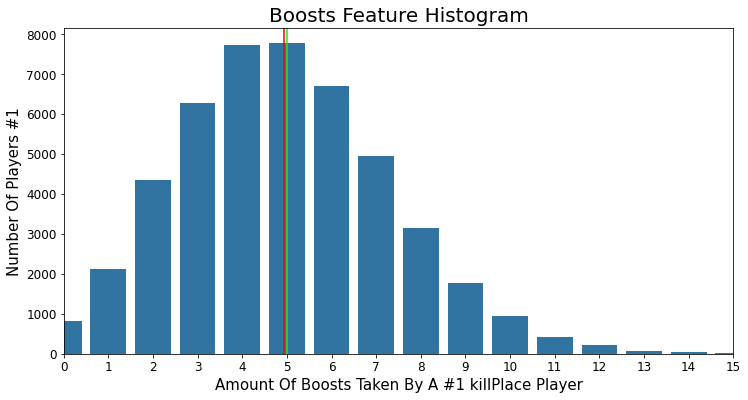

In [14]:
plt.figure(figsize=[12,6])
p=sb.countplot(data=df,x='boosts',color=sb.color_palette()[0])
plt.xlim(0, 15)
p.set_xlabel('Amount Of Boosts Taken By A #1 killPlace Player',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Boosts Feature Histogram',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df['boosts'].mode()[0],color='lime')
plt.axvline(df['boosts'].mean(),color='red')

<font size=3 color='blue'><b> >>>The above chart is quite a normal distribution. The killplace #1 players on average take around 5 boosts in order to finish the game with #1 killPlace and it is the same as the most freqeuent number of boosts used.

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


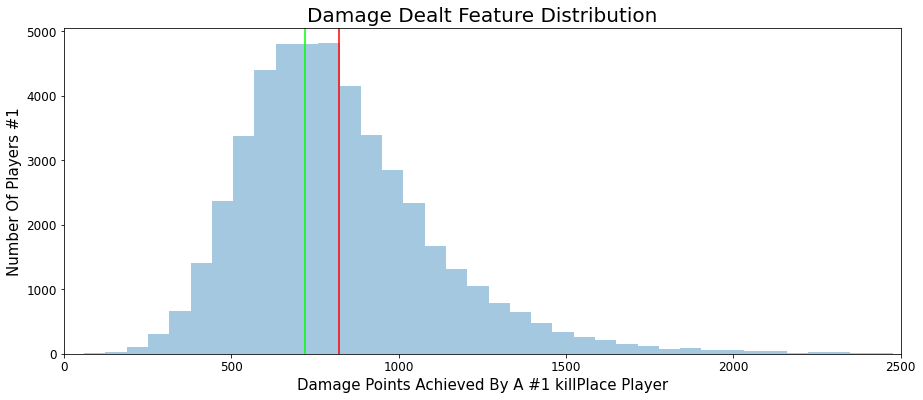

In [15]:
plt.figure(figsize=[15,6])
p=sb.distplot(df['damageDealt'],bins=50,color=sb.color_palette()[0],kde=False)
plt.xlim(0, 2500)
p.set_xlabel('Damage Points Achieved By A #1 killPlace Player',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Damage Dealt Feature Distribution',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df['damageDealt'].mean(),color='red')
plt.axvline(df.damageDealt.round(decimals=-2).mode()[0]+20,color='lime')


<font size=3 color='blue'><b> >>>The above chart is quite a normal distribution. The killplace #1 players on average makes damage around 800 points in order to finish the game with #1 killPlace. But the most frequent is around 700 damage points. <font color ='red'>Note: We did not put into consideration if the player is playing solo fpp or tpp. Since if he is playing solo this may lead to less damage as he finishes the opponents immediately without knocking them. Unlike the duo or the squad if the player fights the opponent who also have an alive teammate, will knock him first then finishing him off and this may lead to more damage points achievements.

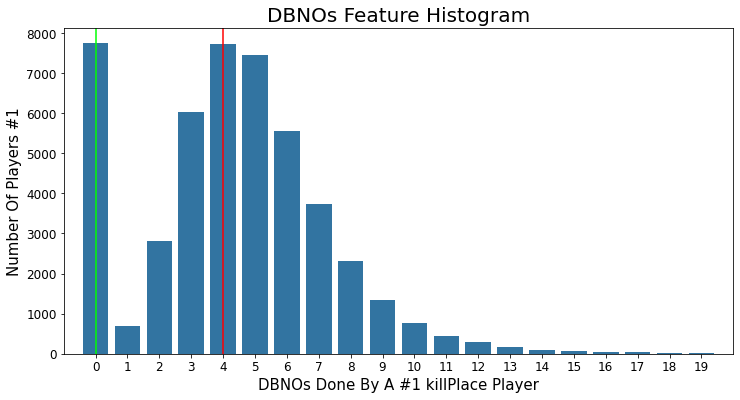

In [16]:
plt.figure(figsize=[12,6])
p=sb.countplot(data=df,x='DBNOs',color=sb.color_palette()[0])
plt.xlim(-1, 20)
p.set_xlabel('DBNOs Done By A #1 killPlace Player',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('DBNOs Feature Histogram',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df['DBNOs'].mode()[0],color='lime')
plt.axvline(round(df['DBNOs'].mean()),color='red')

<font size=3 color='blue'><b> >>>The above chart is showing that most common or frequent players who finish in #1 place always finish their opponents since their DBNos (Knocking down the enemies but not killing them and they(the enemies) get revived) is 0 this information suggests multiple things: 1. these people of 0 DBNOs are playing solo; 2. or they are playing squad but they killed someone who was alone in his team. Second, on overage they knock out 4 players without finishing them and these enemies get revived. <font color='red'>Note that: these knocked out enemies can be counted many times as they get revived. Note: We said earlier that we didn't put into consideration the match-type difference solos vs etc. As the match is solo so there is no knock outs just finishes

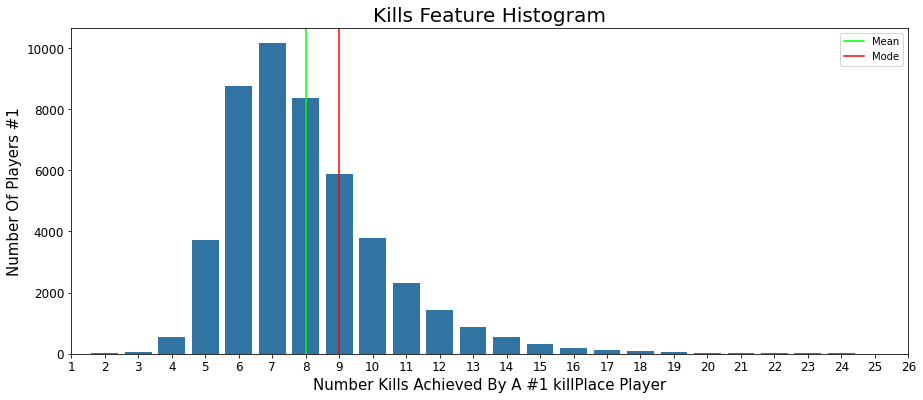

In [17]:
plt.figure(figsize=[15,6])
p=sb.countplot(data=df,x='kills',color=sb.color_palette()[0])
plt.xlim(0, 25)
p.set_xlabel('Number Kills Achieved By A #1 killPlace Player',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Kills Feature Histogram',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df['kills'].mode()[0],color='lime')
plt.axvline(df['kills'].mean(),color='red')
plt.legend(['Mean','Mode'])

<font size=3 color='blue'><b> >>>The above chart is quite a normal distribution. The killplace #1 players on average kill around 8 players in order to finish the game with #1 killPlace. But the most frequent is killing 7 players. Pro players tend to kill more as shown in this graph it can be more than 20 as you may see in YouTube. By the assumption of strong servers.

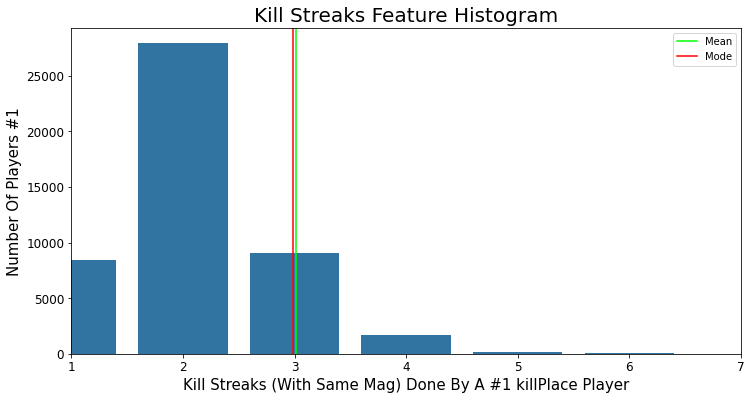

In [18]:
plt.figure(figsize=[12,6])
p=sb.countplot(data=df,x='killStreaks',color=sb.color_palette()[0])
plt.xlim(0, 6)
p.set_xlabel('Kill Streaks (With Same Mag) Done By A #1 killPlace Player',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Kill Streaks Feature Histogram',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df['killStreaks'].mode()[0]+0.01,color='lime')
plt.axvline(round(df['killStreaks'].mean())-0.01,color='red')
plt.legend(['Mean','Mode'])

<font size=3 color='blue'><b> >>>The above countplot seems reasonable since the most common action is killing 2 players with the same mag since most the players like to play with AR ex. (M4-ScarL-M7-Ak) they all have 30 round in mag or 40 if they put an extended mag. Also there are some pro players who can finish squads with the same mag such as the case of killing 4 with 1 mag. The case of killing 5 and 6 with the same mag may often occur with the M249 which can carry more than 75 bullet in 1 mag. <font color='red'>Note: A kill streak is also the amount of kills in a short amount of time or during the time of displaying the kill message. There are some cases witnessed of 18 kill streak but this case seems like the youtubers who make alias with multiple squad and they ask them to take the kills. Or a hacker that disconnected the server before the end of the line of the plane and he killed the disconnected ones. This is why we took a limit of 6 which is quite reasonable.

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


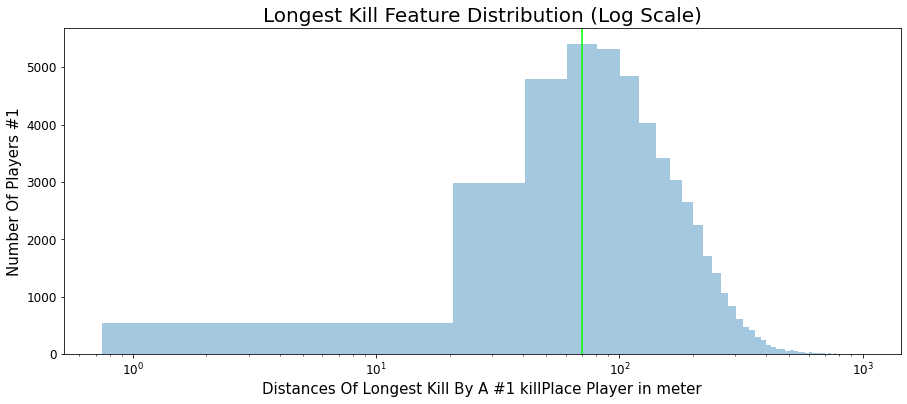

In [19]:
plt.figure(figsize=[15,6])
p=sb.distplot(df['longestKill'],bins=50,color=sb.color_palette()[0],kde=False)
p.set_xlabel('Distances Of Longest Kill By A #1 killPlace Player in meter',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Longest Kill Feature Distribution (Log Scale)',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df.longestKill.round(decimals=-1).mode()[0],color='lime')
p.set_xscale('log')


<font size=3 color='blue'><b> >>>The above chart shows the count of players who kill accross different distances in meters. The killplace #1 players in common are preferably killing their opponents from a distance of around 70 meters as can be seen from the mode (green lime vertical line). We witnessed some outliers such as killing from 1km but it seems very realistic since it is commonly happen by using the AWM sniper. <font color='red'>Note: I used the log scale to take a closer look at the most common action which is killing by a 70m distance and because of the outlier at 1000m which caused a bad scale visualization before using the log.

In [20]:
df.longestKill.round(decimals=-1).mode()[0]

70.0

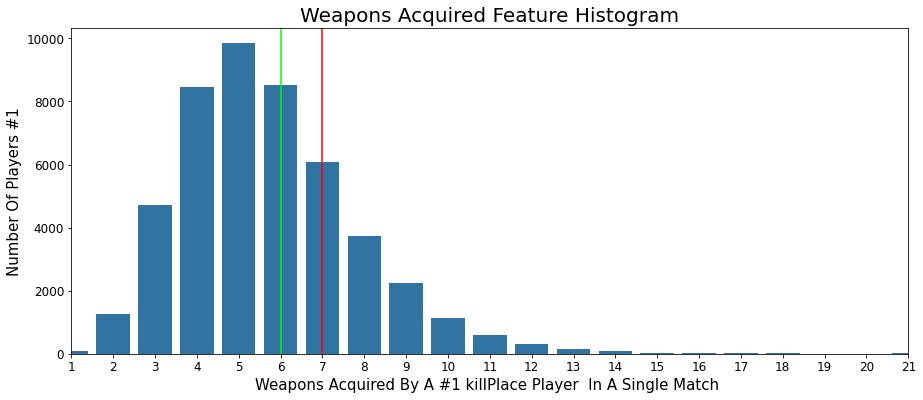

In [21]:
plt.figure(figsize=[15,6])
p=sb.countplot(data=df,x='weaponsAcquired',color=sb.color_palette()[0])
plt.xlim(0, 20)
p.set_xlabel('Weapons Acquired By A #1 killPlace Player  In A Single Match ',fontsize=15)
p.set_ylabel('Number Of Players #1',fontsize=15)
p.set_title('Weapons Acquired Feature Histogram',fontsize=20)
p.tick_params(labelsize=12)
plt.axvline(df.weaponsAcquired.mode()[0],color='lime')
plt.axvline(round(df.weaponsAcquired.mean()),color='red')


<font size=3 color='blue'><b>>>>As we can see, the most frequent case is acquiring 5 weapons [We have mainly 3 slots of weapons 2 for the long guns (SMGs, ARs, Snipers, SGs etc) and 1 slot for the pistol]. In my opinion, this indicates that the case of the most frequent (case of 5) may occur due to changing the 2 slots of long guns 2 additional times this would give 5 times. Such as the drop case these players may take some better long guns from the drop. Also there are some rare cases of acquiring around 20 weapons this would indicate that the player is not satisfied of his weapons, wants to try different weapons or he likes to troll him self xD.

<font size=6 color='blue'><b><i><u>Bivariate Exploration

In [22]:
x=df.corr()
x.style.background_gradient(cmap='RdYlBu')

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
boosts,1.000000,0.192255,-0.045975,0.176662,-0.121319,0.052751,0.212322,0.115315
damageDealt,0.192255,1.000000,0.450102,0.807216,0.204676,0.261617,0.068066,0.105005
DBNOs,-0.045975,0.450102,1.000000,0.392510,0.457050,0.139270,0.052189,-0.007068
kills,0.176662,0.807216,0.392510,1.000000,0.287739,0.223979,0.065585,0.109688
killStreaks,-0.121319,0.204676,0.457050,0.287739,1.000000,-0.027965,-0.037450,-0.024964
longestKill,0.052751,0.261617,0.139270,0.223979,-0.027965,1.000000,0.190514,0.094548
walkDistance,0.212322,0.068066,0.052189,0.065585,-0.037450,0.190514,1.000000,0.070277
weaponsAcquired,0.115315,0.105005,-0.007068,0.109688,-0.024964,0.094548,0.070277,1.000000


In [23]:
pd.set_option('display.max_rows', 64)

<font size=3>In order to see the correlation in descending order to determine the strongest ones we use corr().unstack() function

In [24]:
x.unstack().sort_values(ascending=False)

weaponsAcquired  weaponsAcquired    1.000000
walkDistance     walkDistance       1.000000
damageDealt      damageDealt        1.000000
DBNOs            DBNOs              1.000000
kills            kills              1.000000
killStreaks      killStreaks        1.000000
longestKill      longestKill        1.000000
boosts           boosts             1.000000
kills            damageDealt        0.807216
damageDealt      kills              0.807216
killStreaks      DBNOs              0.457050
DBNOs            killStreaks        0.457050
                 damageDealt        0.450102
damageDealt      DBNOs              0.450102
DBNOs            kills              0.392510
kills            DBNOs              0.392510
killStreaks      kills              0.287739
kills            killStreaks        0.287739
damageDealt      longestKill        0.261617
longestKill      damageDealt        0.261617
                 kills              0.223979
kills            longestKill        0.223979
walkDistan

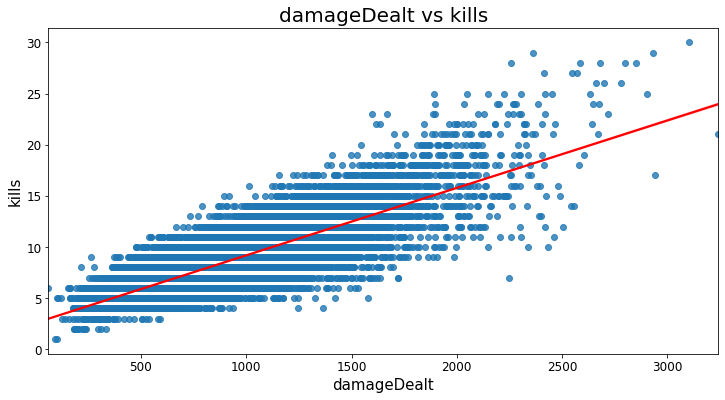

In [25]:
plt.figure(figsize=[12,6])
p=sb.regplot(data=df, x="damageDealt", y="kills",line_kws={"color": "red"})
p.set_xlabel('damageDealt',fontsize=15)
p.set_ylabel('kills',fontsize=15)
p.set_title('damageDealt vs kills',fontsize=20)
p.tick_params(labelsize=12)

<font size=3 color='blue'><b>>>>This sounds logic. As the amount of enemies killed increase the damageDealt increase.

(-2.0, 20.0)

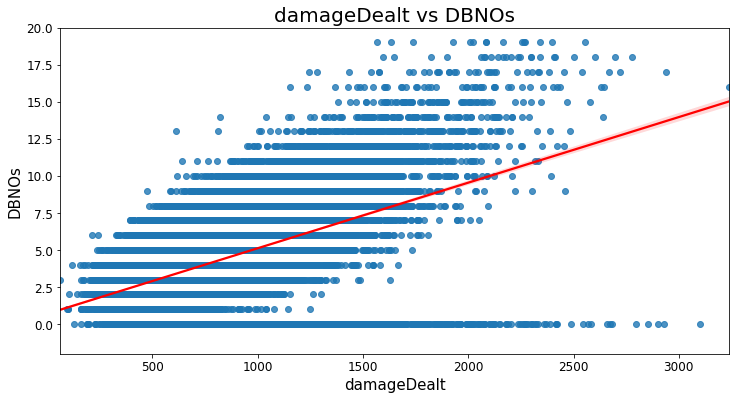

In [26]:
plt.figure(figsize=[12,6])
p=sb.regplot(data=df, x="damageDealt", y="DBNOs",line_kws={"color": "red"})
p.set_xlabel('damageDealt',fontsize=15)
p.set_ylabel('DBNOs',fontsize=15)
p.set_title('damageDealt vs DBNOs',fontsize=20)
p.tick_params(labelsize=12)
plt.ylim(-2,20)

<font size=3 color='blue'><b>>>>Positive correlation exists but the case of 0 DBNOs  would represent 2 cases: case 1. The player is playing solo v solo. case 2. The player is playing in squad is killing someone who was alone in his team. From 1 DBNOs and above there exists a natural positive correlation between each.

(-2.0, 20.0)

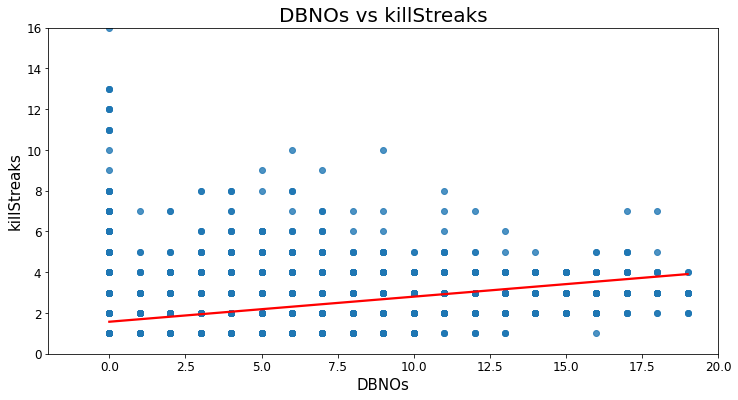

In [27]:
plt.figure(figsize=[12,6])
p=sb.regplot(data=df, x="DBNOs", y="killStreaks",line_kws={"color": "red"})
p.set_xlabel('DBNOs',fontsize=15)
p.set_ylabel('killStreaks',fontsize=15)
p.set_title('DBNOs vs killStreaks',fontsize=20)
p.tick_params(labelsize=12)
plt.ylim(0,16)
plt.xlim(-2,20)

<font size=3 color='blue'><b>>>>0.4 R Positive correlation exists but also as we mentioned earlier the DBNOs case of 0 is indicating that either the player plays solo v solo or playing in squad but killing someone is alone in his team. Herein, this scatterplot shows that the killstreaks at 0 DBNOs are the most since a player who is playing solo v solo he could finish multiple players in a shorter time frame less than the kill message duration easily.

(-2.0, 20.0)

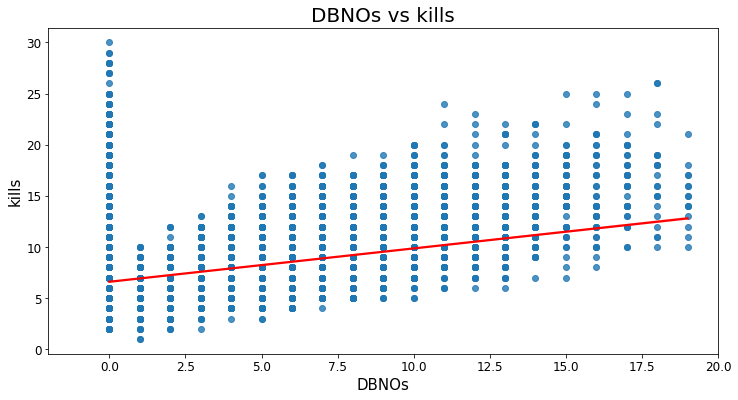

In [28]:
plt.figure(figsize=[12,6])
p=sb.regplot(data=df, x="DBNOs", y="kills",line_kws={"color": "red"})
p.set_xlabel('DBNOs',fontsize=15)
p.set_ylabel('kills',fontsize=15)
p.set_title('DBNOs vs kills',fontsize=20)
p.tick_params(labelsize=12)
#plt.ylim(0,16)
plt.xlim(-2,20)

<font size=3 color='blue'><b>>>>Positive correlation exists. We discussed earlier about what does 0 DBNOs represents go check the last scatter plot

<font size=6 color='blue'><b><i><u>Multivariate Exploration

<font size= 3 color='indigo'><b>Question: How would I categorize these data ?

<font size=3 color='blue'><b>In order to do any multivariabe exploration we must categorize some variables. In my case, I would like to categorize the continuous data [walkDistance , longestKill	, damageDealt]. Based on their quantiles such as the following:

| quantiles | walkDistance_c | longestKill_c | damageDealt_c |
|--- | --- | --- | --- |
| 0% ~ 25% | lazy_walker | close_ranger | low_dmg |
| 25% ~ 75%| active_walker | intermediate_ranger | mid_dmg |
| 75% ~ 75% + std | highly_active_walker | long_ranger | high_dmg |
| 75% + std ~ 100% | interurban_walker | interurban_ranger | john_wick |

<font size=3 color='red'><b> Note: Me as a pro player based on my KD ,average damage and stats stats, compared to other players. I would categorize these features this way since I used to be in the category of which is above the 75% based on my average gameplay ut I did not reach this crazy level of the above 75% + 1 standard deviation for each feature. I also know players or youtubers that are extending 'doing' more than what I do. So I would categorize my self in between the interval of 75% + 1 sigma or standard deviation of the players. And all of the above are the so called 'crazy' players.

In [64]:
df.describe()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
count,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000
mean,4.945589,822.724178,4.332826,8.008132,2.105823,143.509940,2899.308995,5.721986
std,2.401056,293.788609,2.888551,2.401627,0.777382,99.979066,906.593994,2.181408
min,0.000000,61.230000,0.000000,1.000000,1.000000,0.742000,14.030000,1.000000
25%,3.000000,622.000000,3.000000,6.000000,2.000000,73.780000,2357.000000,4.000000
50%,5.000000,778.300000,4.000000,8.000000,2.000000,119.700000,2916.000000,5.000000
75%,6.000000,968.600000,6.000000,9.000000,2.000000,188.800000,3439.500000,7.000000
max,33.000000,3240.000000,19.000000,30.000000,18.000000,1001.000000,13430.000000,26.000000


In [103]:
inf=np.Inf

In [104]:
df['walkDistance_c']=pd.cut(df['walkDistance'],bins=[0,2357,3439.5,3439.5+df['walkDistance'].std(),inf],include_lowest=True,labels=['lazy_walker','active_walker','highly_active_walker','interurban_walker'])

In [105]:
df['longestKill_c']=pd.cut(df['longestKill'],bins=[0,73.78,188.8,188.8+df['longestKill'].std(),inf],include_lowest=True,labels=['close_ranger','intermediate_ranger','long_ranger','interurban_ranger'])

In [106]:
df['damageDealt_c']=pd.cut(df['damageDealt'],bins=[0,622,968.6,968.6+df['damageDealt'].std(),inf],include_lowest=True,labels=['low_dmg','mid_dmg','high_dmg','john_wick'])

In [32]:
df.head()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired,walkDistance_c,longestKill_c,damageDealt_c
0,7,1120.0,8,14,3,112.50,3503.0,8,highly_active_walker,intermediate_ranger,high_dmg
1,6,1563.0,10,13,3,270.30,3723.0,7,highly_active_walker,long_ranger,john_wick
2,11,817.0,0,9,2,157.40,2396.0,4,active_walker,intermediate_ranger,mid_dmg
3,8,623.7,4,7,2,101.30,2539.0,3,active_walker,intermediate_ranger,mid_dmg
4,5,1036.0,7,6,2,75.61,3226.0,10,active_walker,intermediate_ranger,high_dmg


<font size=3 color='blue'><b>Now we are ready to do the multivariate explorations.

<font size = 3 color = 'red'> > Note: We can use a sample subset of the data if the 'overplotting' is bothering.

In [33]:
sample = np.random.choice(df.shape[0],2400,replace=False)

In [34]:
df_subset = df.loc[sample]

<font size=3 color='indigo'><b> How does a walk distance affect the kills over the other features ? Let's investigate the walkDistance_c as a third variable encoding.

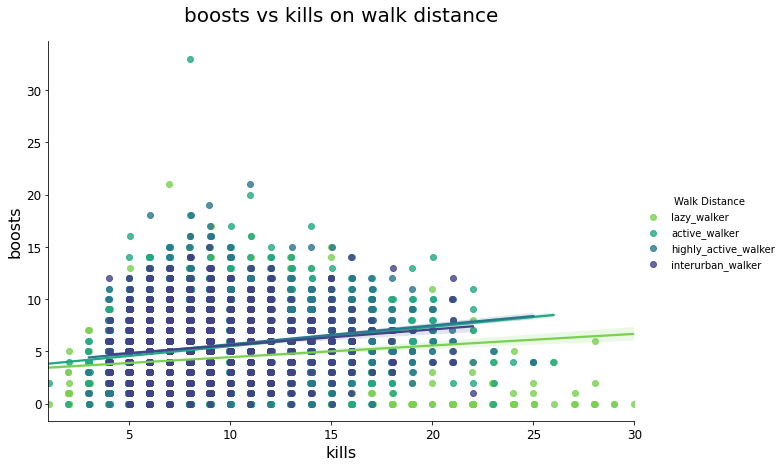

In [35]:
g = sb.FacetGrid(data=df,hue='walkDistance_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','boosts',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Walk Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('boosts',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('boosts vs kills on walk distance',fontsize=20,pad=20);

<font size=3 color='blue'><b> In my case I want to study the behavior of the highest killPlace so I couldn't sample the data also I want to see the outlier of boost takers which has 30+ boosts he is in the category of highly_active_walker usually 3000+ but less than 6000m. And surprisingly, the people who reached 30 kills they didn't even take 1 single boost and they are the less distance walked (<2000m) ['lazy_walker'] so this would suggest that they use a vehicle in their pushes or attacks.

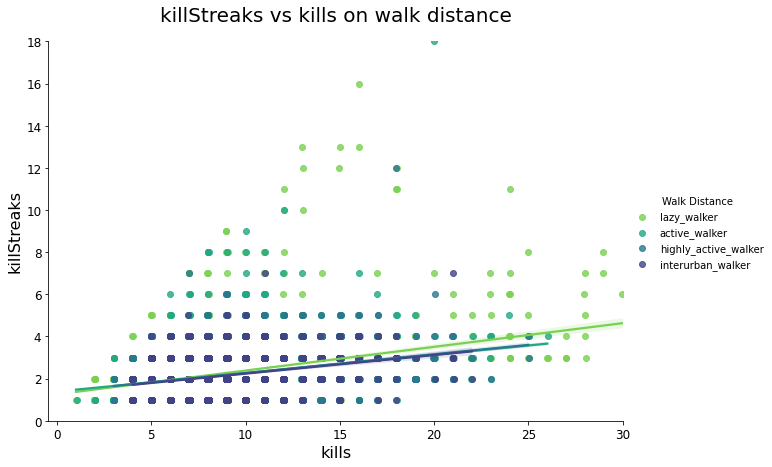

In [36]:
g = sb.FacetGrid(data=df,hue='walkDistance_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','killStreaks',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Walk Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('killStreaks',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,18);
plt.title('killStreaks vs kills on walk distance',fontsize=20,pad=20);

<font size=3 color='blue'><b> This sounds reasonable, since the interurban_walker usually doesn't do kill streaks as he walks many distances to see an enemy or a team to kill. Then this would indicates that the highest kill streaks may come from the other categories not interurban_walker. People who don't walk more than 2000+ m are most likely to use a ride. 

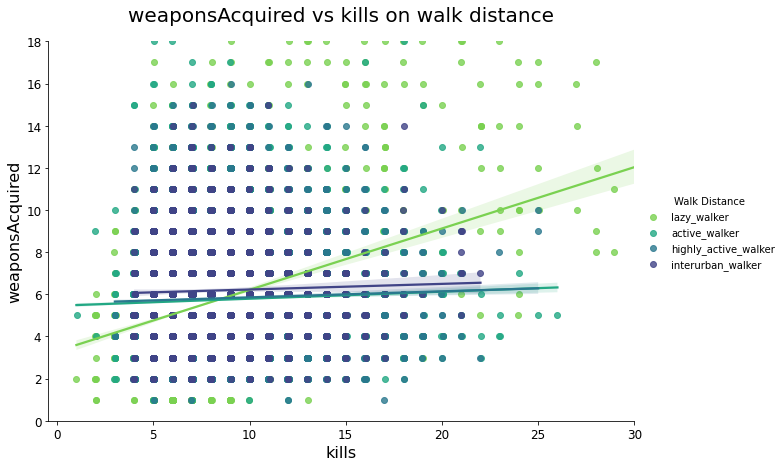

In [37]:
g = sb.FacetGrid(data=df,hue='walkDistance_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','weaponsAcquired',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Walk Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('weaponsAcquired',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,18)
plt.title('weaponsAcquired vs kills on walk distance',fontsize=20,pad=20);

<font size=3 color='blue'><b>This goes far from our expectations since the lazy walkers tends to have a high weapon change rate or many weapons acquires

<font size=3 color='indigo'><b> How can we investigate the damageDealt ?

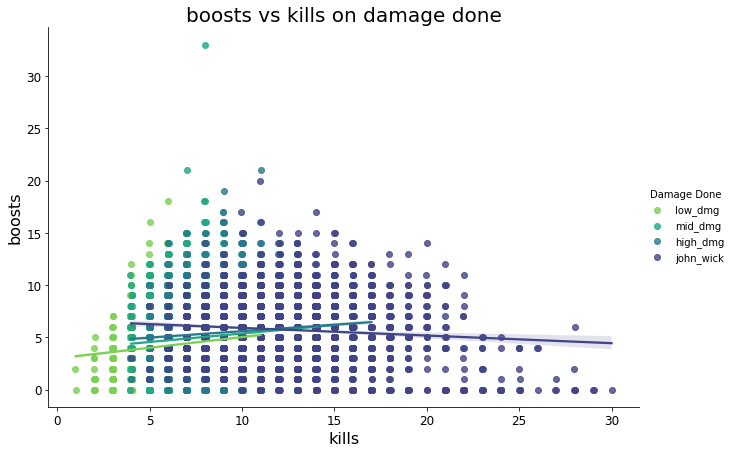

In [38]:
g = sb.FacetGrid(data=df,hue='damageDealt_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','boosts',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Damage Done')
plt.xlabel('kills',fontsize=16)
plt.ylabel('boosts',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('boosts vs kills on damage done',fontsize=20);
#plt.ylim(0,18);

<font size=3 color='blue'><b> The john_wick category is dominating. Since we study the case of the killPlace or the ones who finish the game with the highest number of kills. As we can see the amount of boost would affect the number for the average of john_wick players.

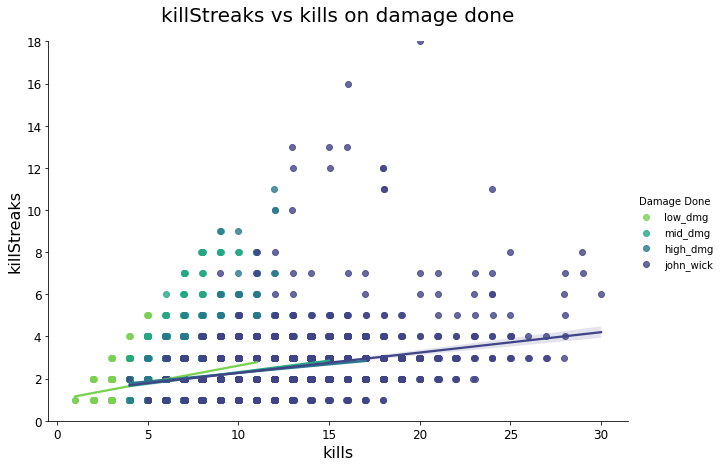

In [39]:
g = sb.FacetGrid(data=df,hue='damageDealt_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','killStreaks',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Damage Done')
plt.xlabel('kills',fontsize=16)
plt.ylabel('killStreaks',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,18)
plt.title('killStreaks vs kills on damage done',fontsize=20,pad=20);

<font size=3 color='blue'><b>Continuing the last argument we suggested. The john_wick categories are also having the highest killStreaks with an amount of reasonable kills between 15 to 20 for a very pro player.

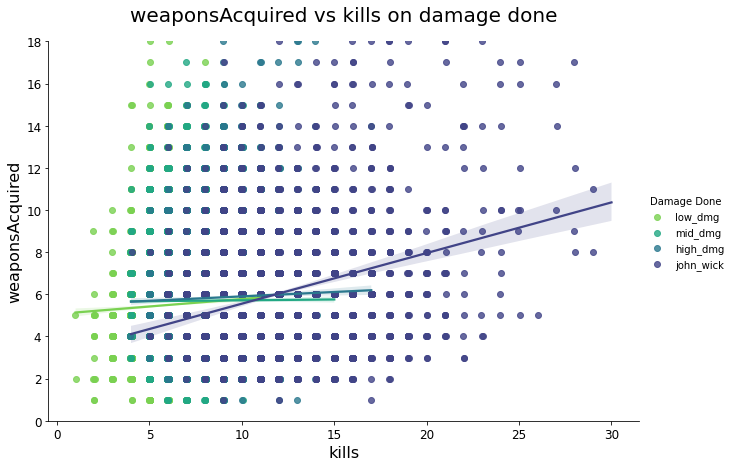

In [40]:
g = sb.FacetGrid(data=df,hue='damageDealt_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','weaponsAcquired',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Damage Done')
plt.xlabel('kills',fontsize=16)
plt.ylabel('weaponsAcquired',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.ylim(0,18);
plt.title('weaponsAcquired vs kills on damage done',fontsize=20,pad=20);

<font size=3 color='blue'><b> The category of john_wick is also dominating in terms of weapon acquiring over number of kills as the reg. line shows.

<font size=3 color='indigo'><b> How can we investigate the longestKill ?

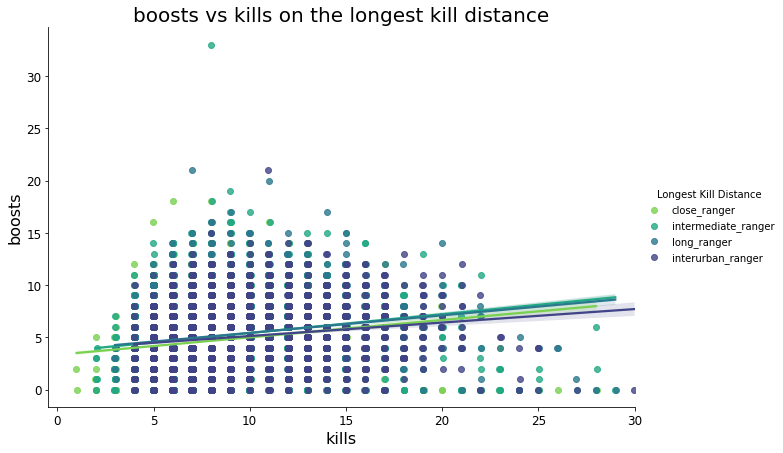

In [41]:
g = sb.FacetGrid(data=df,hue='longestKill_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','boosts',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Longest Kill Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('boosts',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.title('boosts vs kills on the longest kill distance',fontsize=20);
#plt.ylim(0,18);

<font size=3 color='blue'><b>The highest kills are interurban_ranger and long_ranger respectively since they tend to have more kills with low boosts. The highest boost can be seen he is an intermediate_ranger.

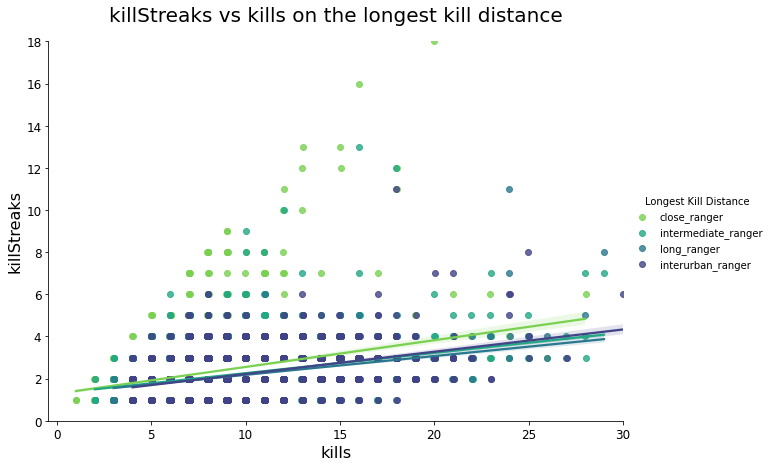

In [42]:
g = sb.FacetGrid(data=df,hue='longestKill_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','killStreaks',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Longest Kill Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('killStreaks',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.ylim(0,18)
plt.title('killStreaks vs kills on the longest kill distance',fontsize=20,pad=20);

<font size=3 color='blue'><b> This is so realistic. Since the close_ranger is having the highest kill streaks as he fights from shorter distance so the bullets would travel faster with an adequate accuracy that makes the kill messages appear in a short interval of time.

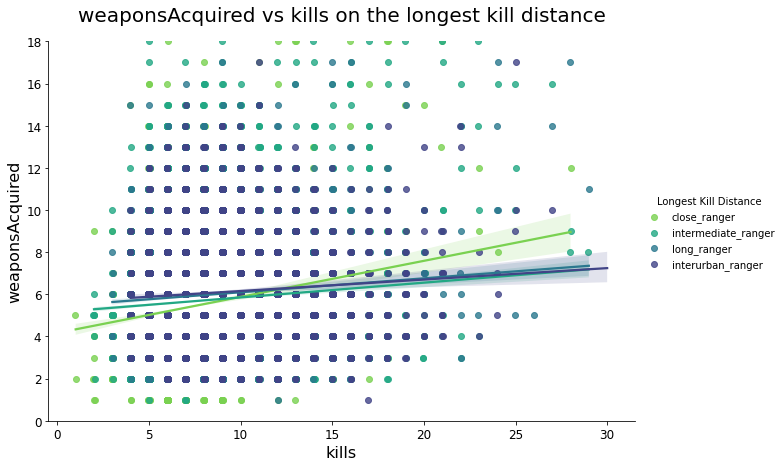

In [43]:
g = sb.FacetGrid(data=df,hue='longestKill_c',height=6,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'kills','weaponsAcquired',x_jitter=0.04,fit_reg=True)
g.add_legend(title='Longest Kill Distance')
plt.xlabel('kills',fontsize=16)
plt.ylabel('weaponsAcquired',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,18)
plt.title('weaponsAcquired vs kills on the longest kill distance',fontsize=20,pad=20);

<font size=3 color='blue'><b> Since this scatter is overplotted. We can rely on the regression line which says that the close_ranger people are most likely to change their weapons when they kill more and more.

<font size = 6 color='black'><b><i><u>Predictions<b><i><u></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('pubg_dataset_area_of_interest.csv')

<font size=3 color='blue'><b>The problem is as the following: We want to predict the number of kills for a player who has finished #1 in killPlace. it seems quite hard but luckily we still have features with good correlation with the number of kills ['kills'].

In [68]:
df.describe()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
count,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000,47343.000000
mean,4.945589,822.724178,4.332826,8.008132,2.105823,143.509940,2899.308995,5.721986
std,2.401056,293.788609,2.888551,2.401627,0.777382,99.979066,906.593994,2.181408
min,0.000000,61.230000,0.000000,1.000000,1.000000,0.742000,14.030000,1.000000
25%,3.000000,622.000000,3.000000,6.000000,2.000000,73.780000,2357.000000,4.000000
50%,5.000000,778.300000,4.000000,8.000000,2.000000,119.700000,2916.000000,5.000000
75%,6.000000,968.600000,6.000000,9.000000,2.000000,188.800000,3439.500000,7.000000
max,33.000000,3240.000000,19.000000,30.000000,18.000000,1001.000000,13430.000000,26.000000


| quantiles | Encoded Categories | Encoded Number [feature_c]
|--- | --- | --- |
| 0% ~ 25% | low | 0 |
| 25% ~ 75%| avg | 1 |
| 75% ~ 75% + std | high | 2 |
| 75% + std ~ 100% | crazy | 3 |

In [2]:
tmp={'low':0,'avg':1,'high':2,'crazy':3}

In [3]:
inf=np.inf

In [6]:
#Input Feature (Before identify the shape of training or test sets)
df['DBNOs_c']=pd.cut(df['DBNOs'],bins=[0,3,6,6+df['DBNOs'].std(),inf],include_lowest=True,labels=tmp.values())
df['killStreaks_c']=pd.cut(df['killStreaks'],bins=[0,2,3,5,inf],include_lowest=True,labels=tmp.values())
df['weaponsAcquired_c']=pd.cut(df['weaponsAcquired'],bins=[0,4,7,7+df['weaponsAcquired'].std(),inf],include_lowest=True,labels=tmp.values())
df['boosts_c']=pd.cut(df['boosts'],bins=[0,3,6,6+df['boosts'].std(),inf],include_lowest=True,labels=tmp.values())
df['walkDistance_c']=pd.cut(df['walkDistance'],bins=[0,2357,3439.5,3439.5+df['walkDistance'].std(),inf],include_lowest=True,labels=tmp.values())
df['longestKill_c']=pd.cut(df['longestKill'],bins=[0,73.78,188.8,188.8+df['longestKill'].std(),inf],include_lowest=True,labels=tmp.values())
df['damageDealt_c']=pd.cut(df['damageDealt'],bins=[0,622,968.6,968.6+df['damageDealt'].std(),inf],include_lowest=True,labels=tmp.values())

| Kills [Target] | Kills Category [Target] | Kills Encoded [Target]
| --- | --- | --- |
| 1 ~ 6 | low_profile_killer | 0 |
| >6 ~ 8 | pro_killer | 1 |
| >8 | killing_machine | 2 |

In [218]:
#3 classes for o/p
tmp2 = {'low_profile_killer':0,'pro_killer':1,'killing_machine':2}

In [149]:
#2 classes for o/p
#tmp2 = {'below 8 kills':0,'above 8 kills':1}

In [261]:
#Target Feature (Before identify the shape of training or test sets)
df['kills_c']=pd.cut(df['kills'],bins=[1,6,8,inf],include_lowest=True,labels=tmp2.values())

In [262]:
df['kills_c'].value_counts()

1    18533
2    15726
0    13084
Name: kills_c, dtype: int64

In [221]:
df.head()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired,DBNOs_c,killStreaks_c,weaponsAcquired_c,boosts_c,walkDistance_c,longestKill_c,damageDealt_c,kills_c
0,7,1120.0,8,14,3,112.50,3503.0,8,2,1,2,2,2,1,2,2
1,6,1563.0,10,13,3,270.30,3723.0,7,3,1,1,1,2,2,3,2
2,11,817.0,0,9,2,157.40,2396.0,4,0,0,0,3,1,1,1,2
3,8,623.7,4,7,2,101.30,2539.0,3,1,0,0,2,1,1,1,1
4,5,1036.0,7,6,2,75.61,3226.0,10,2,0,3,1,1,1,2,0


<font size=4 color='indigo'><b>Which Classifier Can Be Used ?

<font size=3 color='blue'><b>Decision Tree Would Be Great Since We Have 3 Classes In Target [low_profile_killer, pro_killer, killing_machine] And Input Would Be The Categorized Features

In [263]:
#Taking equal samples from each o/p class (target)
sample_df=df.groupby('kills_c').apply(lambda x: x.sample(13000))

In [264]:
sample_df.index=range(sample_df.shape[0])

In [265]:
sample_df.head()

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired,DBNOs_c,killStreaks_c,weaponsAcquired_c,boosts_c,walkDistance_c,longestKill_c,damageDealt_c,kills_c
0,7,750.8,0,5,1,138.60,2550.0,4,0,0,0,2,1,1,1,0
1,3,844.3,6,6,3,134.80,1403.0,4,1,1,0,0,0,1,1,0
2,3,682.9,7,6,3,68.40,3622.0,6,2,1,1,0,2,0,1,0
3,3,349.6,4,5,1,79.69,3943.0,6,1,0,1,0,2,1,0,0
4,3,649.6,5,6,3,124.00,1434.0,3,1,1,0,0,0,1,1,0


In [266]:
sample_df.kills_c.value_counts()

2    13000
1    13000
0    13000
Name: kills_c, dtype: int64

<font size=3 color='red'>We need to reorder the categories by their numerical weights to reduce entropy. Here I would get the correlations from heighest to lowest.

In [267]:
#From the numeric df
sample_df.corr()['kills'].sort_values(ascending=False)

kills              1.000000
damageDealt        0.815554
DBNOs              0.408575
killStreaks        0.301499
longestKill        0.230369
boosts             0.182060
weaponsAcquired    0.107782
walkDistance       0.069578
Name: kills, dtype: float64

In [268]:
inputs=sample_df[['damageDealt_c','DBNOs_c','killStreaks_c','longestKill_c','boosts_c','weaponsAcquired_c','walkDistance_c']]

<font size=3 color='blue'><b>Now let's encode the categories

In [269]:
from sklearn.preprocessing import OrdinalEncoder

In [270]:
enc = OrdinalEncoder()
enc2 = OrdinalEncoder()

In [271]:
inputs[['damageDealt_n','DBNOs_n','killStreaks_n','longestKill_n','boosts_n','weaponsAcquired_n','walkDistance_n']]= enc.fit_transform(inputs[['damageDealt_c','DBNOs_c','killStreaks_c','longestKill_c','boosts_c','weaponsAcquired_c','walkDistance_c']])
inputs = inputs[['damageDealt_n','DBNOs_n','killStreaks_n','longestKill_n','boosts_n','weaponsAcquired_n','walkDistance_n']]

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [272]:
target = pd.DataFrame(enc2.fit_transform(pd.DataFrame(sample_df['kills_c']))).rename(columns={0: 'output'})

In [273]:
inputs.head()

,damageDealt_n,DBNOs_n,killStreaks_n,longestKill_n,boosts_n,weaponsAcquired_n,walkDistance_n
0,1.0,0.0,0.0,1.0,2.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,2.0,1.0,0.0,0.0,1.0,2.0
3,0.0,1.0,0.0,1.0,0.0,1.0,2.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [274]:
target.head()

,output
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<font size = 3, color='blue'>Now that the data is encoded. Let's split the data into training and testing set

In [275]:
whole_data=inputs.copy()
whole_data['output']=target

In [276]:
whole_data

,damageDealt_n,DBNOs_n,killStreaks_n,longestKill_n,boosts_n,weaponsAcquired_n,walkDistance_n,output
0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
38995,1.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0
38996,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
38997,3.0,3.0,0.0,2.0,3.0,0.0,2.0,2.0
38998,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0


<font size=3 color = 'blue'><b>Training Set And Test Set Splitting

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
x = whole_data.loc[:, whole_data.columns != 'output']
y = whole_data['output']

In [366]:
x_train , y_train , x_test  , y_test = train_test_split(x, y ,random_state=42)

In [367]:
x_train.shape , x_test.shape , y_train.shape  , y_test.shape

((29250, 7), (29250,), (9750, 7), (9750,))

<font size = 3 color = 'blue'><b>Apply the decision tree

In [368]:
from sklearn import tree

In [369]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,x_test)

DecisionTreeClassifier()

In [370]:
model.score(x_train,x_test),model.score(y_train,y_test)

(0.688923076923077, 0.6183589743589744)

<font size=3 color ='blue'><b>>0.6 is considered as a good accuracy for our problem note that the decision tree is very sensitive to noisy data and it can be also increased as we change the tuning parameter

In [384]:
model2 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5,splitter='best') #High max_depth = overfitting , low = underfitting
model2.fit(x_train,x_test)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [385]:
model2.score(x_train,x_test),model2.score(y_train,y_test)

(0.6528888888888889, 0.6482051282051282)

<font size=3 color='blue'>We can see that the test set accuracy is increased a little bit but it also remains at the >0.6. Lets try another classifier (randomforest) and apply it another type after tuning

In [373]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
model3 = RandomForestClassifier() 
model3.fit(x_train,x_test)

In [378]:
model3.score(x_train,x_test),model3.score(y_train,y_test)

(0.688923076923077, 0.6284102564102564)

<font size=3 color='blue'>After tuning

In [390]:
model4 = RandomForestClassifier(max_depth=5) 
model4.fit(x_train,x_test)

RandomForestClassifier(max_depth=5)

In [391]:
model4.score(x_train,x_test),model4.score(y_train,y_test)

(0.6552136752136752, 0.6491282051282051)

<font size = 6 color='black'><b><i><u>Conclusion<b><i><u></font>

<font size=3 color='blue'><b> The question was: What do the players who finish in #1 killPlace (killing the most number of enemies in a signle match) do ?. So we decided to get the highest correlated variables with killPlace and they are ['kills','damageDealt','DBNOs','killStreaks','longestKills','boosts','weaponsAcquired','walkDistance' , removed the outliers using the percentile and studied each feature [univariate exploration, bivariate exploration and multivariate exploration] besides we gave all of the explanations of each plot during these processes. In the end, we categorized each feature and then we encoded into 4 classes [low:0 , avg:1 , high:2 , crazy:3] for each feature so we decided to use the decision tree or random forest classifier by taking the output to be predicted ['kills'] categorized from [low_profile_killer: 0, pro_killer: 1, killing_machine: 2] and the range of kills is based on the percentiles and mentioned during encoding. The results of the prediction shows around 65% accuracy for each classifier which is not bad for a problem like this.